In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!mkdir -p /kaggle/working/matcha_data/


In [2]:
!mkdir -p /kaggle/working/matcha_data_text/text_train

In [ ]:
import os

file_path = '/kaggle/working/Matcha-TTS/matcha/text/cleaner.py'
if os.path.exists(file_path):
    os.remove(file_path)
    print("Đã xóa file.")
else:
    print("File không tồn tại.")


In [ ]:
import shutil
import os

folder_path = '/kaggle/working/matcha_data/wavs'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print("Đã xóa thư mục.")
else:
    print("Thư mục không tồn tại.")


In [4]:
!cp -r /kaggle/input/voicewavv/data_audio/* /kaggle/working/matcha_data


In [3]:
!cp -r /kaggle/input/audio-textt/data_text/* /kaggle/working/matcha_data_text/text_train

In [6]:
import os

# Đường dẫn filelist gốc
filelist_path = "/kaggle/working/matcha_data_text/text_train/audio_text_train_filelist.txt"

# Thư mục chứa file âm thanh trong Kaggle
base_path = "/kaggle/working/matcha_data"

# Đọc file gốc
with open(filelist_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

# Xử lý từng dòng
new_lines = []
for line in lines:
    if "|" not in line:
        continue
    audio_path, text = line.strip().split("|", 1)
    # Chuẩn hóa đường dẫn
    audio_path = (
        audio_path.replace("\\", "/")   # đổi \ -> /
        .replace("../", "")             # bỏ ../
        .replace("..\\", "")            # bỏ ..\
    )
    filename = os.path.basename(audio_path)
    full_path = os.path.join(base_path, filename)
    new_lines.append(f"{full_path}|{text}")

# ⚠️ Ghi đè lại file gốc
with open(filelist_path, "w", encoding="utf-8") as f:
    f.write("\n".join(new_lines))

print("✅ Filelist đã được chỉnh sửa trực tiếp tại:", filelist_path)


✅ Filelist đã được chỉnh sửa trực tiếp tại: /kaggle/working/matcha_data_text/text_train/audio_text_train_filelist.txt


In [ ]:
!apt-get update -y
!apt-get install -y espeak-ng


In [ ]:
!git clone https://github.com/shivammehta25/Matcha-TTS.git



In [9]:
%cd Matcha-TTS


/kaggle/working/Matcha-TTS


In [18]:
!cp -r /kaggle/input/dataaa/dataa/* /kaggle/working/Matcha-TTS/matcha/text

In [11]:
!cp -r /kaggle/input/looogg/* /kaggle/working/Matcha-TTS

In [ ]:
import re

path = "/kaggle/working/matcha_data_text/text_train/audio_text_val_filelist.txt"

with open(path, encoding="utf-8") as f:
    lines = f.readlines()

pattern = re.compile(r"[̪ˈː͡ʰʷ̯̃́̀]+")  # các ký tự đặc biệt thường gặp
for i, line in enumerate(lines):
    if pattern.search(line):
        print(f"Lỗi dòng {i+1}: {line.strip()}")


In [14]:
import re

path = "requirements.txt"
txt = open(path).read().splitlines()
txt = [t for t in txt if not any(x in t for x in ["torchvision", "piper_phonemize"])]
txt += ["underthesea", "num2words"]
open(path, "w").write("\n".join(txt))
print("✅ Updated requirements.txt")


✅ Updated requirements.txt


In [17]:
!sed -i 's/english_cleaners2/basic_cleaners_phothong/g' matcha/cli.py


In [ ]:
!pip install -r requirements.txt


In [ ]:
!pip install -e . --find-links=https://download.pytorch.org/whl/torch_stable.html


In [21]:
from matcha.text import cleaners
from matcha.text import symbols

print("🔤 Tổng số ký hiệu trong tokenizer:", len(symbols))
print(symbols[:50])  # In thử 50 ký hiệu đầu


🔤 Tổng số ký hiệu trong tokenizer: 457
['_', '#', ';', ':', ',', '.', '!', '?', '¡', '¿', '-', '—', '…', "'", '"', '«', '»', '“', '”', '(', ')', '[', ']', '/', '%', ' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x']


In [24]:
!python matcha/utils/generate_data_statistics.py -i matcha_vi.yaml


 77%|█████████████████████████████████          | 20/26 [00:17<00:02,  2.41it/s]max value is  tensor(1.0029)
{'mel_mean': -4.8656792640686035, 'mel_std': 2.0388100147247314}                


In [25]:
import os

base = "/kaggle/working/Matcha-TTS/configs"
os.makedirs(f"{base}/data", exist_ok=True)
os.makedirs(f"{base}/experiment", exist_ok=True)

data_yaml = """_target_: matcha.data.text_mel_datamodule.TextMelDataModule
name: matcha_vi

train_filelist_path: /kaggle/working/matcha_data_text/text_train/audio_text_train_filelist.txt
valid_filelist_path: /kaggle/working/matcha_data_text/text_train/audio_text_val_filelist.txt

batch_size: 16       # mỗi GPU, tổng = 32
num_workers: 4
pin_memory: True
load_durations: false
cleaners: [basic_cleaners_phothong]
add_blank: True
n_spks: 1
n_fft: 1024
n_feats: 80
sample_rate: 22050
hop_length: 256
win_length: 1024
f_min: 0
f_max: 8000

data_statistics:
  mel_mean: -4.8656792640686035
  mel_std: 2.0388100147247314

seed: ${seed}
"""

exp_yaml = """# @package _global_
phonemizer:
  language: "vi"
defaults:
  - override /data: matcha_vi.yaml

tags: ["matcha_vi"]
run_name: matcha_vi

model:
  n_vocab: 500

trainer:
  max_epochs: 550
  check_val_every_n_epoch: 10
  devices: [0,1]        # Dùng cả 2 GPU T4
  accelerator: gpu
  strategy: ddp          # Distributed Data Parallel

test: False

extras:
  ignore_warnings: true
  enforce_tags: false
  print_config: false

hydra:
  run:
    dir: ${paths.log_dir}/${run_name}

callbacks:
  model_summary:
    max_depth: 1
  model_checkpoint:
    every_n_epochs: 20

logger:
  tensorboard:
    version: mel80band
    default_hp_metric: false

"""

with open(f"{base}/data/matcha_vi.yaml", "w") as f:
    f.write(data_yaml)
with open(f"{base}/experiment/matcha_vi.yaml", "w") as f:
    f.write(exp_yaml)

print("✅ Created configs:")
print("- configs/data/matcha_vi.yaml")
print("- configs/experiment/matcha_vi.yaml")


✅ Created configs:
- configs/data/matcha_vi.yaml
- configs/experiment/matcha_vi.yaml


In [23]:
from phonemizer.backend import EspeakBackend
EspeakBackend.is_available()
espeak = EspeakBackend("vi")
print(espeak.phonemize(["xin", "chào", "mọi", "người"]))


['sin ', 'tʃaː2w ', 'mɔ6j ', 'ŋyə2j ']


In [54]:
from matcha.text import symbols, _symbol_to_id

bad_lines = []
with open("/kaggle/working/matcha_data_text/text_train/audio_text_train_filelist.txt", "r", encoding="utf-8") as f:
    for i, line in enumerate(f, 1):
        try:
            path, text = line.strip().split("|")
        except ValueError:
            print(f"❌ Lỗi format dòng {i}: {line}")
            continue

        for c in text:
            if c not in symbols:
                bad_lines.append((i, c, text))
                break

print("Số dòng có ký tự lạ:", len(bad_lines))
for i, c, text in bad_lines[:10]:
    print(f"⚠️ Dòng {i}: '{c}' không có trong symbols → {text}")


Số dòng có ký tự lạ: 0


In [ ]:
!python matcha/train.py experiment=matcha_vi ckpt_path=log/checkpoint_epoch319.ckpt

[2025-11-06 20:16:58,066][phonemizer][WARNING] - 1 utterances containing language switches on lines 1
[2025-11-06 20:16:58,066][phonemizer][WARNING] - extra phones may appear in the "vi" phoneset
[2025-11-06 20:16:58,066][phonemizer][WARNING] - language switch flags have been removed (applying "remove-flags" policy)
Epoch 471/549 ━━━━━━━━━━╸━━━━ 148/206 0:01:17 •       2.04it/s v_num: band step:
                                      0:00:29                  97172.000        
                                                               loss/train_step: 
                                                               8.602            
                                                               loss/train_epoch:
                                                               9.643            
                                                               loss/val_step:   
                                                               97.860           
                                  

In [27]:
import shutil

# Nén thư mục thành file zip
shutil.make_archive('/kaggle/working/Matcha-TTS/logs', 'zip', '/kaggle/working/Matcha-TTS/logs')


'/kaggle/working/Matcha-TTS/logs.zip'

In [ ]:
from IPython.display import FileLink
FileLink('/kaggle/working/Matcha-TTS.zip')


In [30]:
!find /kaggle/working/Matcha-TTS -type f | grep -E "logs|csv|json"


/kaggle/working/Matcha-TTS/configs/logger/csv.yaml
/kaggle/working/Matcha-TTS/matcha_vi.json
/kaggle/working/Matcha-TTS/logs.zip
/kaggle/working/Matcha-TTS/.git/logs/HEAD
/kaggle/working/Matcha-TTS/.git/logs/refs/heads/main
/kaggle/working/Matcha-TTS/.git/logs/refs/remotes/origin/HEAD
/kaggle/working/Matcha-TTS/logs/matcha_vi/.hydra/hydra.yaml
/kaggle/working/Matcha-TTS/logs/matcha_vi/.hydra/overrides.yaml
/kaggle/working/Matcha-TTS/logs/matcha_vi/.hydra/config.yaml
/kaggle/working/Matcha-TTS/logs/matcha_vi/train_ddp_process_1.log
/kaggle/working/Matcha-TTS/logs/matcha_vi/checkpoints/checkpoint_epoch=519.ckpt
/kaggle/working/Matcha-TTS/logs/matcha_vi/checkpoints/checkpoint_epoch=359.ckpt
/kaggle/working/Matcha-TTS/logs/matcha_vi/checkpoints/checkpoint_epoch=539.ckpt
/kaggle/working/Matcha-TTS/logs/matcha_vi/checkpoints/checkpoint_epoch=419.ckpt
/kaggle/working/Matcha-TTS/logs/matcha_vi/checkpoints/checkpoint_epoch=379.ckpt
/kaggle/working/Matcha-TTS/logs/matcha_vi/checkpoints/last.ckpt

In [45]:
!kill 12853
%reload_ext tensorboard
%tensorboard --logdir /kaggle/working/Matcha-TTS/logs/matcha_vi/tensorboard/mel80band --port 6006


<IPython.core.display.Javascript object>

In [46]:
from tensorboard.backend.event_processing import event_accumulator

ea = event_accumulator.EventAccumulator("/kaggle/working/Matcha-TTS/logs/matcha_vi/tensorboard/mel80band")
ea.Reload()

scalars = ea.Scalars('train/loss')  # hoặc thử 'val/loss' nếu không có
print("Số lượng step:", len(scalars))
print("Loss cuối cùng:", scalars[-1].value)


2025-11-07 01:46:00.818971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762479960.841253      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762479960.847982      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


KeyError: 'Key train/loss was not found in Reservoir'

In [49]:
import numpy as np
values = [s.value for s in scalars[-10:]]
print("Trung bình 10 step cuối:", np.mean(values))


Trung bình 10 step cuối: 11.17905912399292


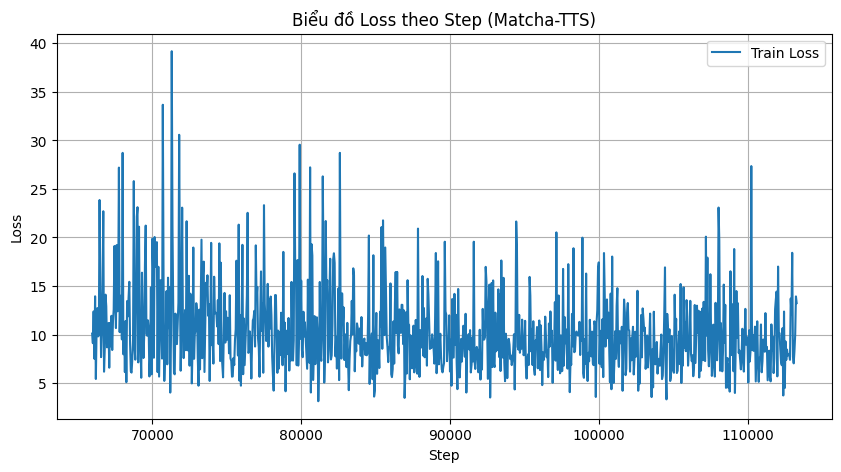

In [50]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

# Load file log TensorBoard
ea = event_accumulator.EventAccumulator("/kaggle/working/Matcha-TTS/logs/matcha_vi/tensorboard/mel80band")
ea.Reload()

# Lấy dữ liệu loss
scalars = ea.Scalars('loss/train_step')
steps = [s.step for s in scalars]
values = [s.value for s in scalars]

# Vẽ đồ thị
plt.figure(figsize=(10,5))
plt.plot(steps, values, label='Train Loss', linewidth=1.5)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Biểu đồ Loss theo Step (Matcha-TTS)')
plt.legend()
plt.grid(True)
plt.show()
